# Laboratorio 2
---
Integrantes:
* Belter Molina 
* Esvin Molina
---

## Análisis Exploratorio

Diccionario de Datos:

* ID: identificación del cliente
* Year_Birth: año de nacimiento del cliente
* Education: nivel de educación del cliente
* Marital_Status: estado civil del cliente
* Income: ingreso familiar anual del cliente
* Kidhome: número de niños pequeños en el hogar del cliente
* Teenhome: número de adolescentes en el hogar del cliente
* Dt_Customer: fecha de alta del cliente en la empresa 
* Recency: número de días desde la última compra
* MntWines: cantidad gastada en productos vitivinícolas (derivados de la uva, como vinos) en los últimos 2 años 
* MntFruits: cantidad gastada en productos de frutas en los últimos 2 años
* MntMeatProducts: cantidad gastada en productos cárnicos en los últimos 2 años 
* MntFishProducts: cantidad gastada en productos pesqueros en los últimos 2 años 
* MntSweetProducts: cantidad gastada en productos dulces en los últimos 2 años
* MntGoldProds: cantidad gastada en productos de oro en los últimos 2 años  
* NumDealsPurchases: número de compras realizadas con descuento  
* NumWebPurchases: número de compras realizadas a través del sitio web de la empresa
* NumCatalogPurchases: número de compras realizadas por catálogo 
* NumStorePurchases: número de compras realizadas directamente en tiendas  
* NumWebVisitsMonth: número de visitas al sitio web de la empresa en el último mes
* AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3a campaña, 0 en caso contrario 
* AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4a campaña, 0 en caso contrario 
* AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5a campaña, 0 en caso contrario 
* AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1a campaña, 0 en caso contrario
* AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2a campaña, 0 en caso contrario 
* Complain: 1 si el cliente se quejó en los últimos 2 años 
* Z_CostContact: costo para contactar a un cliente
* Z_Revenue: ingresos después de la campaña de aceptación del cliente 
* Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.  Esta es la columna a predecir.

Importamos las librerías a utilizar

In [3]:
# importamos las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modulos

Cargamos el dataset y revisamos los primeros cinco registros y ver que datos tenemos

In [4]:
# Definimos algunas constantes a utilizar para mejor mantenimiento del programa
dataset_entrada = 'marketing_campaign.csv'
columna_target = 'Response'

df = pd.read_csv(dataset_entrada, sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Vemos cuantos registros y columnas trae nuestro dataset

In [5]:
df.shape

(2240, 29)

Tratamiento de NANs

Verificamos que Columnas que tienen NAN

In [6]:
def getNanColNames(df):
    """
    Retorna los nombres de las columnas del dataframe df que tienen NAs
    """
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum() > 0):
            cols_con_na.append(col)
    return cols_con_na

cols_con_nan = getNanColNames(df)
print(cols_con_nan)


['Income']


Vemos que solamente la columna Income tiene NANs.  

Vemos el tipo de datos de las columnas que tienen NAN

In [ ]:
df[cols_con_nan].dtypes

Vemos la proporción de NANs

In [7]:
df[cols_con_nan].isnull().mean()

Income    0.010714
dtype: float64

Vemos que solamente un 1% de registros de la columna Income tiene NAN, por lo que procedemos a eliminar los NANs debido a que tenemos suficientes registros

In [8]:
df = df.dropna()

Aplicamos criterio de CCA (Complete Case Analysis)

In [34]:
def getNanGoodColsNames(df, rate = 0.2):
    """
    - Retorna las columnas del dataframe df que tienen suficiente información para ser procesada.
    - El parámetro rate indica la minima proporción de datos que deben tener las columnas del dataframe para
      ser considerada como procesable.  El valor por default es 0.2
    """

    cols_procesables = []
    for col in df.columns:
        if((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables

# Verificamos las columnas que tienen suficiente información para ser procesada.  Una proporción de 0.5.
cols_cca = getNanGoodColsNames(df, 0.05)
print(cols_cca)
# Vemos que todas las columnas del dataframe tienen la proporción de información suficiente para ser procesadas.

# Aplicamos criterio de CCA a las columnas que no cumplen con la proporción de datos
df_temp = df[cols_cca].dropna()

# Verificamos cuantos registros y columnas quedan después de aplicar el criterio CCA
df.shape, df_temp.shape
print(df.shape, df_temp.shape)
# Vemos que nos quedamos con un dataset de 2,216 registros y 29 columnas.

# ***************************************************************************************************************************************

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
(2216, 29) (2216, 29)


Listamos las columnas que trae el dataset

Revisamos el balanceo de la información en función del target.   La distribución del target y algunas otras características que podamos encontrar:

In [9]:
# Balancear los datos en función del target.
df[columna_target].value_counts()

0    1883
1     333
Name: Response, dtype: int64

Podemos ver que será necesario realizar algún tipo de balanceo de los datos.

Revisamos como esta la distribución de los datos en las variables:

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

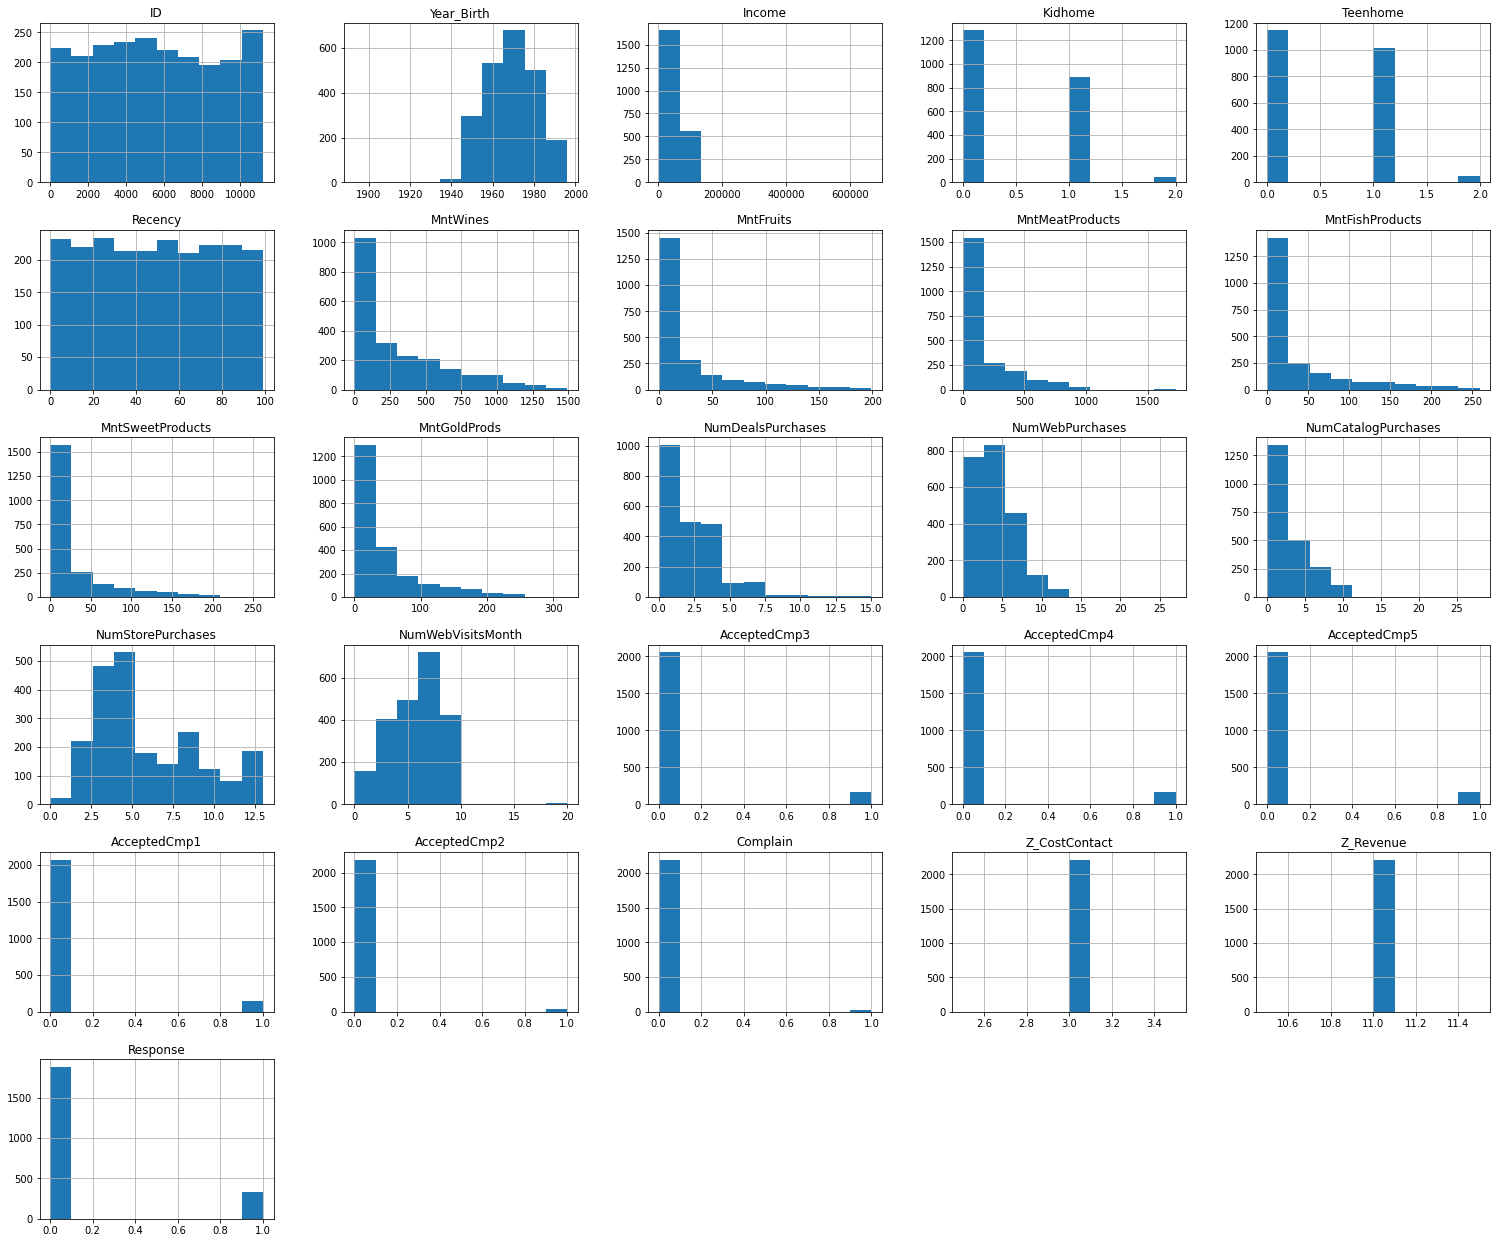

In [11]:
plt.rcParams['figure.figsize'] = (26,22)
df.hist()

Podemos ver que hay varias variables que presentan algún tipo de sesgo, la mayoría hacia la derecha, por lo que vamos a tratarlas realizando algunas transformaciones.

Revisamos la tabla de correlación entre las variables:

In [13]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


Obtenemos que columnas son categóricas, numéricas discretas y numéricas continuas

In [25]:
#obtenemos tipos de datos de columnas de dataframe
categoric_vars, discrete_vars , continues_vars = modulos.getColumnsDataTypes(df=df)

In [35]:
# Eliminamos DT_Customer de las variables categóricas ya que es un campo de fecha
date_vars = 'Dt_Customer'

categoric_vars.remove(date_vars)

In [31]:
#Eliminamos variable target.
discrete_vars.remove(columna_target)

##### 1.1) Análisis de Datos Categóricos

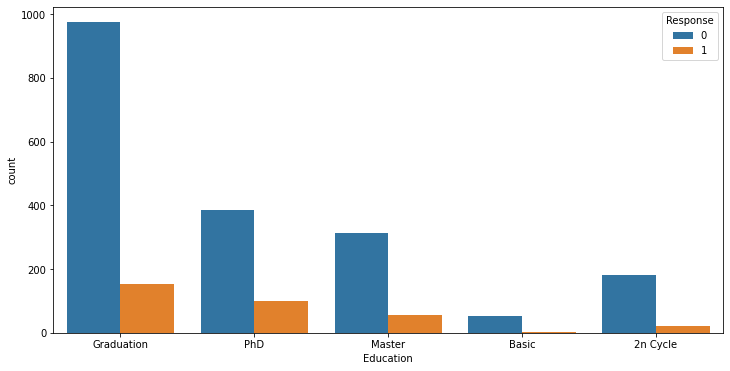

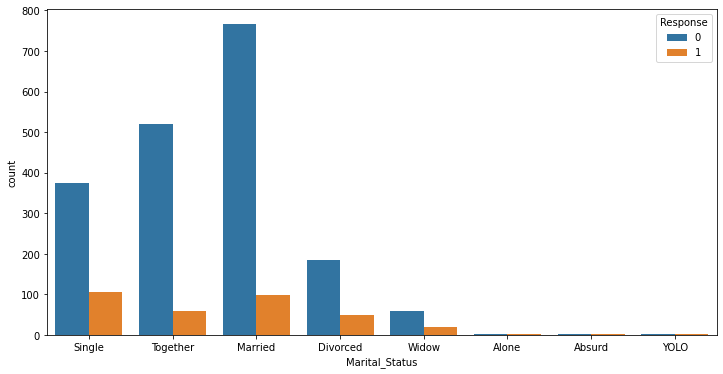

In [36]:
modulos.plotCategoricalVals(df, categoric_vars, y=columna_target)